# Model simple linear equation using tensorflow keras API

In [ ]:
# creating model for a simple linear equation (2x+2) using tensorflow keras API
# keras API model can accept numpy array data type, create 2 object for attribute and label
import tensorflow as tf
import numpy as np
from tensorflow import keras

xs = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], dtype=float)
ys = np.array([4.0, 6.0, 8.0, 10.0, 12.0, 14.0], dtype=float)

# create neural network model
# with 1 layer
# model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
# with more than 1 layer
model = tf.keras.Sequential([
    keras.layers.Dense(units=1, input_shape=[1]),
    keras.layers.Dense(units=8),
    keras.layers.Dense(units=1)
])


# optimizer and loss function
model.compile(optimizer="sgd", loss="mean_squared_error");

# train the model
model.fit(xs, ys, epochs=150)

print(model.predict([10.0]))

Epoch 1/150
1/1 [==============================] - 0s 379ms/step - loss: 71.8605
Epoch 2/150
1/1 [==============================] - 0s 9ms/step - loss: 0.4499
Epoch 3/150
1/1 [==============================] - 0s 7ms/step - loss: 0.4310
Epoch 4/150
1/1 [==============================] - 0s 10ms/step - loss: 0.4333
Epoch 5/150
1/1 [==============================] - 0s 11ms/step - loss: 0.5381
Epoch 6/150
1/1 [==============================] - 0s 9ms/step - loss: 1.1146
Epoch 7/150
1/1 [==============================] - 0s 9ms/step - loss: 4.2116
Epoch 8/150
1/1 [==============================] - 0s 9ms/step - loss: 14.3216
Epoch 9/150
1/1 [==============================] - 0s 9ms/step - loss: 57.4028
Epoch 10/150
1/1 [==============================] - 0s 8ms/step - loss: 5.2012
Epoch 11/150
1/1 [==============================] - 0s 8ms/step - loss: 13.7686
Epoch 12/150
1/1 [==============================] - 0s 8ms/step - loss: 51.3589
Epoch 13/150
1/1 [==============================] - 

# Model 2 class classification

In [ ]:
# creating model for 2 class classification
# upload datasets
import pandas as pd
df = pd.read_csv('citrus.csv')

# show info
#df.info()
#df.head()

# change name atribute into number
df.loc[df.name == 'orange', 'name'] = 0
df.loc[df.name == 'grapefruit', 'name'] = 1

# create numpy array
dataset = df.values
#dataset

# split atribute and label in dataset
# pick last 5 columns as atribute
X = dataset[:,1:6]
# bilangan sebelum koma untuk memilih baris pada dataframe
# bilangan setelah koma untuk memilih kolom pada dataframe
y = dataset[:,0]

# normalization
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

# split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, y, test_size=0.3)

# change label datatype into float32 from boolean
import numpy as np
Y_train = Y_train.astype(np.float32)
Y_test = Y_test.astype(np.float32)

# create neural network model
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(32, activation="relu", input_shape=(5,)),
    Dense(32, activation="relu"),
    Dense(1, activation="sigmoid")
])

# compile model
model.compile(optimizer="sgd",
              loss="binary_crossentropy",
              metrics=['accuracy'])

# train model
model.fit(X_train, Y_train, epochs=100)

# evaluate model
# first element is loss, and second is accuracy
model.evaluate(X_test, Y_test)

# predict using model
new_data = np.array([[7.86, 146.34, 154, 69, 16]])
new_data_scaled = min_max_scaler.fit_transform(new_data)
new_prediction = model.predict(new_data_scaled)

threshold = 0.5
if new_prediction >= threshold:
  print('orange')
else:
  print('grapefruit')

Epoch 1/100
219/219 [==============================] - 1s 3ms/step - loss: 0.6713 - accuracy: 0.6731
Epoch 2/100
219/219 [==============================] - 1s 3ms/step - loss: 0.6274 - accuracy: 0.8353
Epoch 3/100
219/219 [==============================] - 1s 3ms/step - loss: 0.5709 - accuracy: 0.8791
Epoch 4/100
219/219 [==============================] - 1s 2ms/step - loss: 0.4960 - accuracy: 0.9137
Epoch 5/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4109 - accuracy: 0.9237
Epoch 6/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3338 - accuracy: 0.9259
Epoch 7/100
219/219 [==============================] - 0s 2ms/step - loss: 0.2771 - accuracy: 0.9284
Epoch 8/100
219/219 [==============================] - 0s 2ms/step - loss: 0.2403 - accuracy: 0.9294
Epoch 9/100
219/219 [==============================] - 0s 2ms/step - loss: 0.2174 - accuracy: 0.9300
Epoch 10/100
219/219 [==============================] - 0s 2ms/step - loss: 0.2033 - accura

# Model multi-class classification

Epoch 1/100
105/105 [==============================] - 1s 3ms/step - loss: 0.9072 - accuracy: 0.6857
Epoch 2/100
105/105 [==============================] - 0s 3ms/step - loss: 0.5766 - accuracy: 0.7048
Epoch 3/100
105/105 [==============================] - 0s 3ms/step - loss: 0.4025 - accuracy: 0.8000
Epoch 4/100
105/105 [==============================] - 0s 2ms/step - loss: 0.3211 - accuracy: 0.8762
Epoch 5/100
 97/105 [==========================>...] - ETA: 0s - loss: 0.2692 - accuracy: 0.9278
Akurasi telah mencapai >90%!
1/1 [==============================] - 0s 99ms/step
[[0.91871935 0.0753145  0.00596611]]
The iris is: iris-setosa


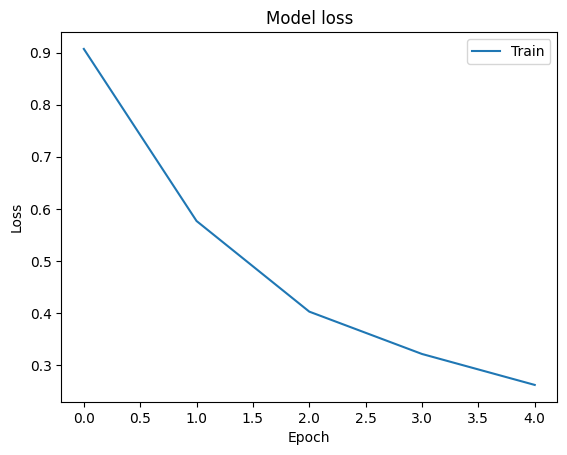

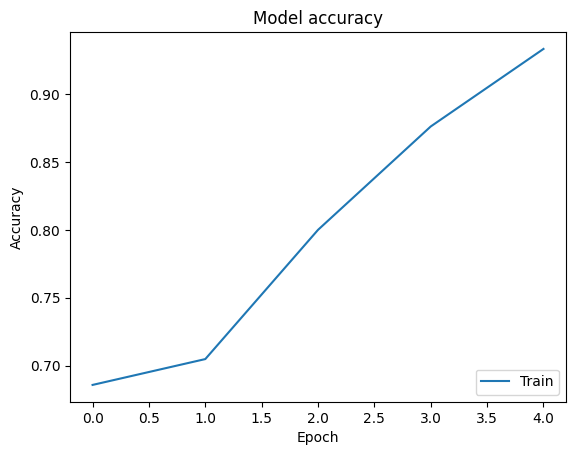

In [ ]:
# creating a model for multi-class classification
# with callbacks
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

df = pd.read_csv('Iris.csv')
#df.head(100)

# drop useless column
df = df.drop(columns='Id')
#df

# one hot encoding because label is categorical
category = pd.get_dummies(df.Species)
#category

# combine one hot encoding column and drop Species column in dataframe
df = pd.concat([df, category], axis=1)
df = df.drop(columns='Species')

# convert dataframe into numpy array
dataset = df.values

# split label and attribute
# attribute = first 4 columns
X = dataset[:, 0:4]
# label = last 3 columns (4-6)
y = dataset[:, 4:7]

# normalization
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

# split into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, y, test_size=0.3)

# create model
model = Sequential([
    Dense(64, activation='relu', input_shape=(4,)),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

# compile model
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# create a callback to stop train early when accuracy is over 90%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print('\nAkurasi telah mencapai >90%!')
      self.model.stop_training = True
callbacks = myCallback()

# train model
hist = model.fit(X_train, Y_train, epochs=100, batch_size=1, callbacks=[callbacks])

# evaluate model
model.evaluate(X_test, Y_test, batch_size=1)

# predict using model
# [4.6, 3.1, 1.5, 0.2] iris setosa
# [6.7, 3.0,	5.2,	2.3] iris virginica
new_data = np.array([[8.7, 5.0,	6.2,	4.3]])
new_data_scaled = min_max_scaler.fit_transform(new_data)
prediction = model.predict(new_data_scaled)

predict_index = np.argmax(prediction)
labels = ['iris-setosa', 'iris-versicolor', 'iris-virginica']
result = labels[predict_index]
print(prediction)
print(f"The iris is: {result}")

# plot loss from trained model
plt.plot(hist.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

# plot accuracy from trained model
plt.plot(hist.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()

# Using tensorflow dataset

In [ ]:
# using tensorflow dataset
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

# create object to contain dataset
mnist = tf.keras.datasets.mnist

# split into train and test\
# load data returns a dataset that has been split into train(atribute,label) and test(atribute,label)
(gambar_latih, label_latih), (gambar_testing, label_testing) = mnist.load_data()

# display label and one image from train data using matplotlib
np.set_printoptions(linewidth=200)
plt.imshow(gambar_latih[0])
print(label_latih[0])

# normalization
gambar_latih = gambar_latih / 255.0
gambar_testing = gambar_testing / 255.0

# create model
# flatten -> change 2d input into 1d array
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# complie model
model.compile(
    optimizer = tf.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# train model
model.fit(gambar_latih, label_latih, epochs=5)

# Model to process image dataset from real world

In [ ]:
# create model to process image dataset from real world
# download data
!wget --no-check-certificate \
    https://github.com/dicodingacademy/assets/raw/main/ml_pengembangan_academy/Chessman-image-dataset.zip \
    -O /tmp/Chessman-image-dataset.zip

import os
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# extract dataset
local_zip = '/tmp/Chessman-image-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

# check directory
os.listdir('/tmp/Chessman-image-dataset/Chess')

# check how many images in each directory
print('total pawn images : ', len(os.listdir('/tmp/Chessman-image-dataset/Chess/Pawn')))
print('total king images : ', len(os.listdir('/tmp/Chessman-image-dataset/Chess/King')))
print('total knight images : ', len(os.listdir('/tmp/Chessman-image-dataset/Chess/Knight')))

# check one of the images
img = image.load_img('/tmp/Chessman-image-dataset/Chess/King/00000145.png')
imgplot = plt.imshow(img)

# implement image augmentation
train_dir = os.path.join('/tmp/Chessman-image-dataset/Chess')
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode='nearest',
    validation_split=0.1    #split 0.1 of the train directory for validation
)

# create train and validation generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=8,
    class_mode='categorical',
    subset='training' #set as training data
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=16,
    class_mode='categorical',
    subset='validation'
)

# create model
model = tf.keras.models.Sequential([
    # the input shape is the desired size of the image 150 x 150 with 3 bytes of color
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),
    # Flatten the result to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

# compile model
model.compile(
    optimizer=tf.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# train model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=50,
    verbose=2
)

# plot to check accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# plot to check loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Transfer Learning

In [ ]:
# transfer learning
!wget --no-check-certificate \
  https://github.com/dicodingacademy/assets/raw/main/ml_pengembangan_academy/Chessman-image-dataset.zip \
  -O /tmp/Chessman-image-dataset.zip

import os
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator
local_zip = '/tmp/Chessman-image-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
train_dir = os.path.join('/tmp/Chessman-image-dataset/Chess')
train_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode = 'nearest',
    validation_split=0.1) # set validation split

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=8,
    class_mode='categorical',
    subset='training') # set as training data
validation_generator = train_datagen.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical',
    subset='validation')

# transfer learning
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import ResNet152V2
model = tf.keras.models.Sequential([
    ResNet152V2(weights='imagenet', include_top=False, input_tensor=Input(shape=(150,150,3))),
    # tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.layers[0].trainable = False

# compile model
model.compile(optimizer=tf.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

# train model
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              epochs=50,
                              verbose=2)

# Style Transfer

In [ ]:
# style transfer
import tensorflow as tf
def tensor_to_image(tensor):
  tensor = tensor*255
  tensor = np.array(tensor, dtype=np.uint8)
  if np.ndim(tensor)>3:
    assert tensor.shape[0] == 1
    tensor = tensor[0]
  return PIL.Image.fromarray(tensor)

def image_to_tensor(path_to_img):
  img = tf.io.read_file(path_to_img)
  img = tf.image.decode_image(img, channels=3, dtype=tf.float32)

  #resize the image to specific dimensions
  img = tf.image.resize(img, [512,512])
  img = img[tf.newaxis, :]
  return img

# convert image
# upload image in colab
kucing_tensor = image_to_tensor('/content/meltryllis.jpg')
style_tensor = image_to_tensor('/content/vangogh.jpg')

import tensorflow_hub as hub
import numpy as np
import PIL.Image
import time
import functools
hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/1')
stylized_image = hub_module(tf.constant(kucing_tensor), tf.constant(style_tensor))[0]
tensor_to_image(stylized_image)

# Tokenization

In [ ]:
# tokenization
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=15, oov_token="-")

# text to tokenized
teks = ["Saya Suka Programming",
        "Programming sangat menyenangkan",
        "Machine Learning berbeda dengan pemrograman konvensional",
        "Axel jatuh cinta sama Meltryllis"]

# implement tokenization
tokenizer.fit_on_texts(teks)

# change text into sequence
sequences = tokenizer.texts_to_sequences(teks)

# print tokenized word
print(tokenizer.word_index)
print(tokenizer.texts_to_sequences(['Saya Suka Programming']))
print(tokenizer.texts_to_sequences(['Saya suka belajar programing sejak smp']))

# padding on text
from tensorflow.keras.preprocessing.sequence import pad_sequences
sequences_samapanjang = pad_sequences(sequences,
                                      padding='post', #add padding in the end of text
                                      maxlen=5, # max sequence length
                                      truncating='post') #take the first maxlen words and discard the rest if words > maxlen
print(sequences_samapanjang)



# Embedding

In [ ]:
# embedding
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(jumlah_kata, dimensi_embedding, panjang_input),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(padded_latih, label_latih,
          epochs=num_epochs,
          validation_data=(padded_test, label_test))

# Binary text classification

In [ ]:
# binary text classification
import pandas as pd
df = pd.read_csv('yelp_labelled.txt', names=['sentence', 'label'], sep='\t')
df.tail() # check 5 last item

# split dataset
from sklearn.model_selection import train_test_split
kalimat = df['sentence'].values
y = df['label'].values
kalimat_latih, kalimat_test, y_latih, y_test = train_test_split(kalimat, y, test_size=0.2)

# implement tokenization
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=250, oov_token='x')
tokenizer.fit_on_texts(kalimat_latih)
tokenizer.fit_on_texts(kalimat_test)

sekuens_latih = tokenizer.texts_to_sequences(kalimat_latih)
sekuens_test = tokenizer.texts_to_sequences(kalimat_test)

padded_latih = pad_sequences(sekuens_latih, maxlen=20)
padded_test = pad_sequences(sekuens_test, maxlen=20)

# create model
import tensorflow as tf
model = tf.keras.Sequential([
    # 250 is the number of words in tokenizer vocabulary
    # 16 is the embedding dimension
    # 20 is the length of the sequence
    tf.keras.layers.Embedding(250, 16, input_length=20),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# train model
model.fit(
    padded_latih,
    y_latih,
    epochs=30,
    validation_data=(padded_test, y_test),
    verbose=2
)

# predict using model
teks = ['i was not impressed with this restaurant',
        'the food here is good',
        'this was not a waste of time']

sekuens_tebak = tokenizer.texts_to_sequences(teks)
padded_tebak = pad_sequences(sekuens_tebak, maxlen=20)

prediksi = model.predict(padded_tebak)

hasil = (prediksi > 0.5).astype(int)

for i in range(len(teks)):
  if hasil[i] == 1:
    print(f'Text: "{teks[i]}" is a positive review')
  else:
    print(f'Text: "{teks[i]}" is a negative review')

print('Probability: ', prediksi)
print('Result: ', hasil)

# Long Short Term Memory (LSTM) Layer

In [ ]:
# LSTM Layer
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64), # add this before Dense layer
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

# Multiclass text classification

In [ ]:
# multiclass text classification
import pandas as pd
df = pd.read_csv('imdb_indonesian_movies_2.csv')
df = df.drop(columns=['judul_film'])
df.head()

# one hot encoding
category = pd.get_dummies(df.genre)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns=['genre'])
df_baru

# split attribute and label
sinopsis = df_baru['ringkasan_sinopsis'].values
label = df_baru[['Drama', 'Horor', 'Komedi', 'Laga', 'Romantis']].values

# split data into train and test
from sklearn.model_selection import train_test_split
sinopsis_latih, sinopsis_test, label_latih, label_test = train_test_split(sinopsis, label, test_size=0.2)

# implement tokenizer and pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(sinopsis_latih)
tokenizer.fit_on_texts(sinopsis_test)

sekuens_latih = tokenizer.texts_to_sequences(sinopsis_latih)
sekuens_test = tokenizer.texts_to_sequences(sinopsis_test)

padded_latih = pad_sequences(sekuens_latih)
padded_test = pad_sequences(sekuens_test)

# create model
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# train model
num_epochs = 30
model.fit(
    padded_latih,
    label_latih,
    epochs=num_epochs,
    validation_data=(padded_test, label_test),
    verbose=2
)

# NLTK libraries

In [ ]:
# NLTK libraries
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

example_sent = """this is a sample sentence, showing off the stop words filtration."""

stop_words = set(stopwords.words('english'))

word_tokens = word_tokenize(example_sent)

filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]

print(word_tokens)
print(filtered_sentence)

sentence = "Think and wonder, wonder and think."

tokenizer = nltk.RegexpTokenizer(r"\w+")
new_words = tokenizer.tokenize(sentence)
print(new_words)

# Time series with LSTM

In [ ]:
# Time series with LSTM
import numpy as np
import pandas as pd
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import tensorflow as tf

data_train = pd.read_csv('DailyDelhiClimateTrain.csv')
data_train.head()

# check for null values
data_train.isnull().sum()

# make plot to determine data type
dates = data_train['date'].values
temp = data_train['meantemp'].values

plt.figure(figsize=(15,5))
plt.plot(dates, temp)
plt.title('Temperature average', fontsize=20)

# function to change atribute and label into batch
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  series = tf.expand_dims(series, axis=-1)
  ds = tf.data.Dataset.from_tensor_slices(series)
  ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
  ds = ds.flat_map(lambda w: w.batch(window_size+1))
  ds = ds.shuffle(shuffle_buffer)
  ds = ds.map(lambda w: (w[:-1], w[-1:]))
  return ds.batch(batch_size).prefetch(1)

# create model LSTM
train_set = windowed_dataset(temp, window_size=60, batch_size=100, shuffle_buffer=1000)
model = tf.keras.models.Sequential([
    LSTM(60, return_sequences=True),
    LSTM(60),
    Dense(30, activation="relu"),
    Dense(10, activation="relu"),
    Dense(1)
])

optimizer = tf.keras.optimizers.SGD(learning_rate=1.0000e-04, momentum=0.9)
model.compile(
    loss=tf.keras.losses.Huber(),
    optimizer=optimizer,
    metrics=['mae']
)
history = model.fit(train_set, epochs=100)

plt.plot(history.history['loss'])
plt.plot(history.history['mae'])
plt.title('Model Loss MAE')
plt.ylabel('Loss & MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'MAE'], loc='upper right')
plt.show()

# predictions
data_test = pd.read_csv('DailyDelhiClimateTest.csv')

date_test = data_test['date'].values
temp_test = data_test['meantemp'].values

test_set = windowed_dataset(temp_test, window_size=60, batch_size=100, shuffle_buffer=1000)

predictions = model.predict(test_set)

plt.figure(figsize=(15,5))
plt.plot(date_test[60:], temp_test[60:], label='Actual Temperature', color='blue')
plt.plot(date_test[60:], predictions, label='Predicted Temperature', color='red')
plt.title('Temperature Prediction with LSTM', fontsize=20)
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

# Model Save Format

In [ ]:
#Saved Model format
save_path = 'mymodel/'
tf.saved_model.save(model, save_path)

#HDF5
model.save('model.h5')

#ONNX
!pip install onnxruntime
!pip install -U tf2onnx
!python -m tf2onnx.convert --saved-model "saved_model" --output "model.onnx" --extra_opset ai.onnx.contrib:1
#https://github.com/rfajri27/try_convert_onnx/blob/main/try_convert_tf2onnx.ipynb

# Deploy model with tensorflow.js

In [ ]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, LSTM, Dropout
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk.corpus import stopwords
import json

nltk.download('stopwords')

df = pd.read_csv('yelp_labelled.txt', names=['sentence', 'label'], sep='\t')

# change all text into lowercase
df['sentence'] = df['sentence'].str.lower()

# remove stopwords
stop_word = set(stopwords.words('english'))

df['sentence'] = df['sentence'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_word)]))

# split dataset
sentence = df['sentence'].values
label = df['label'].values

sentence_train, sentence_test, label_train, label_test = train_test_split(sentence, label, test_size=0.2)
print(sentence_train[0])
print(sentence_test[0])

# tokenization
filt = '!"#$%&()*+.,-/:;=?@[\]^_`{|}~ ' # regex to remove symbols

tokenizer = Tokenizer(num_words=2000, oov_token='<OOV>', filters=filt)

tokenizer.fit_on_texts(sentence_train)

# save word_index to a json file
word_index = tokenizer.word_index

with open('word_index.json', 'w') as fp:
  json.dump(word_index, fp)

# create sequences and padding
train_sekuens = tokenizer.texts_to_sequences(sentence_train)
test_sekuens = tokenizer.texts_to_sequences(sentence_test)

train_padded = pad_sequences(train_sekuens, maxlen=20, padding='post', truncating='post')
test_padded = pad_sequences(test_sekuens, maxlen=20, padding='post', truncating='post')

# create model
model = tf.keras.Sequential([
    Embedding(input_dim=2000, output_dim=20, input_length=20),
    GlobalAveragePooling1D(),
    Dense(64, activation="relu"),
    Dense(32, activation="relu"),
    Dense(1, activation="sigmoid")
])

# compile model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# train model
num_epochs=30
modelku = model.fit(
    train_padded,
    label_train,
    epochs = num_epochs,
    validation_data=(test_padded, label_test),
    verbose=2
)

plt.style.use("ggplot")
plt.figure(figsize=(10,10))
plt.plot(np.arange(0, num_epochs), modelku.history["accuracy"], label="training")
plt.plot(np.arange(0, num_epochs), modelku.history["val_accuracy"], label="validation")
plt.title("Plot Akurasi")
plt.xlabel("Epoch")
plt.ylabel("Akurasi")
plt.legend()
plt.savefig('images/plot_acc.png')
plt.show()

model.save('model.h5')

# install tensorflow js
!pip install tensorflowjs

# convert model.h5 to model
!tensorflowjs_converter --input_format=keras model.h5 tfjs_model